In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../galess")
import lens_plot
import HOD

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/giofer/anaconda3/envs/HOD/lib/python3.11/site-packages/halomod/halo_exclusion.py:18: UserWarning: Warning: Some Halo-Exclusion models have significant speedup when using Numba
  warnings.warn(


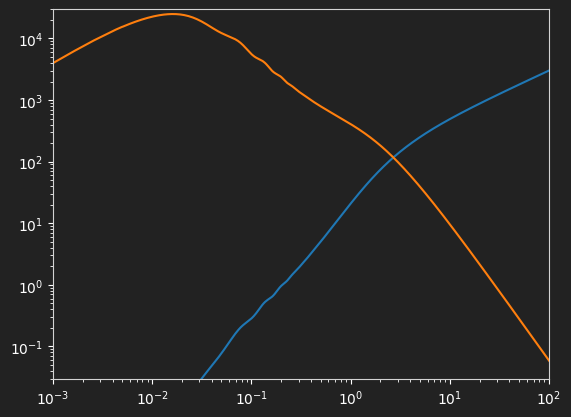

In [35]:
from hmf import MassFunction
from astropy.cosmology import FlatLambdaCDM
cosmo  = FlatLambdaCDM(H0=67.74, Om0=0.3089, Tcmb0=2.725)
OmegaM = cosmo.Om(0)
OmegaL = cosmo.Ode(0)
OmegaK = cosmo.Ok(0)
OmegaB = 0.049
OmegaC = OmegaM-OmegaB
H0 = cosmo.H(0).value
h  = H0/100


z = 0
plt.plot(hmf.k, hmf.nonlinear_delta_k)
plt.plot(hmf.k, hmf.nonlinear_power)
plt.xscale('log')
plt.yscale('log')
plt.xlim((1e-3, 1e2))
plt.ylim((3e-2, 3e4))
plt.show()

In [11]:
if(0):
    z = 1.7
    M_sat, M_min, sigma_logM, alpha = 10**14.18, 10**12.46, 0.2, 1.0
    z_array = np.array([1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2])
    N_z_nrm = np.array([0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0])
elif(0):
    z = 1.7
    M_sat, M_min, sigma_logM, alpha = 10**12.48, 10**11.55, 0.2, 1.0
    z_array = np.array([1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2])
    N_z_nrm = np.array([0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0])

elif(0):
    z = 2.9
    M_sat, M_min, sigma_logM, alpha = 10**12.55, 10**11.71, 0.2, 1.0
    data = [
            [2.000000e+00, 2.017570e-02],
            [2.100000e+00, 5.120140e-02],
            [2.200000e+00, 8.963850e-02],
            [2.300000e+00, 1.257240e-01],
            [2.400000e+00, 1.558000e-01],
            [2.500000e+00, 2.025050e-01],
            [2.600000e+00, 2.320880e-01],
            [2.700000e+00, 3.334470e-01],
            [2.800000e+00, 3.349540e-01],
            [2.900000e+00, 4.237170e-01],
            [3.000000e+00, 4.196420e-01],
            [3.100000e+00, 4.230910e-01],
            [3.200000e+00, 4.523410e-01],
            [3.300000e+00, 3.643720e-01],
            [3.400000e+00, 1.837830e-01],
            [3.500000e+00, 4.229380e-02],
            [3.600000e+00, 3.679960e-02],
            [3.700000e+00, 3.273170e-02],
            [3.800000e+00, 5.401130e-02],
            [3.900000e+00, 2.088890e-02],
            [4.000000e+00, 1.080040e-02]
            ]
    z_array = np.array([row[0] for row in data])
    N_z_nrm = np.array([row[1] for row in data])
else:
    z = 4.9
    M_sat, M_min, sigma_logM, alpha = 10**11.86, 10**11.57, 0.2, 1.0
    data = [
    (4.300000e+00, 1.300650e-02),
    (4.400000e+00, 1.332110e-02),
    (4.500000e+00, 1.609830e-01),
    (4.600000e+00, 1.659040e-01),
    (4.700000e+00, 3.460340e-01),
    (4.800000e+00, 2.671030e-01),
    (4.900000e+00, 2.569500e-01),
    (5.000000e+00, 1.880120e-01),
    (5.100000e+00, 1.704260e-01),
    (5.200000e+00, 1.871200e-01),
    (5.300000e+00, 7.831920e-02)
    ]
    z_array, N_z_nrm = np.array(data).T

M_h_array, HMF_array, nu_array, hmf_k, hmf_PS = HOD.init_lookup_table(z)
NTOT = HOD.N_tot(M_h_array, M_sat, alpha, M_min, sigma_logM)
N_g_AVG = HOD.get_AVG_N_tot(M_min, sigma_logM, M_sat, alpha, z)
M_h_AVG = HOD.get_AVG_Host_Halo_Mass(M_min, sigma_logM, M_sat, alpha, z)
b_eff = HOD.get_EFF_gal_bias(M_min, sigma_logM, M_sat, alpha, z, USE_MY_BIAS = 0)
f_sat = HOD.get_AVG_f_sat(M_min, sigma_logM, M_sat, alpha, z)
n_avg = HOD.get_N_dens_avg(z_array, M_min, sigma_logM, M_sat, alpha, z, N_z_nrm)

print(f'redshift z   : {z:.2f}')
print(f'n_avg        : {n_avg:.2e}')
print(f'N_g_AVG      : {N_g_AVG:.2e}')
print(f'log(M_h_AVG) : {np.log10(M_h_AVG):.2f}')
print(f'b_eff        : {b_eff:.2f}')
print(f'log(f_sat)   : {np.log10(f_sat):.2f}')

Calculating HMF table at redshift 4.90


/Users/giofer/anaconda3/envs/HOD/lib/python3.11/site-packages/hmf/mass_function/fitting_functions.py:1600: RuntimeWarning: divide by zero encountered in log10
  ngtm_behroozi = 10 ** (theta + np.log10(ngtm_tinker))
/Users/giofer/anaconda3/envs/HOD/lib/python3.11/site-packages/hmf/density_field/halofit.py:107: UserWarning: sigma_8 is not used any more, and will be removed in v4
  warnings.warn("sigma_8 is not used any more, and will be removed in v4")


Calculating HMF table at redshift 4.30
Calculating HMF table at redshift 4.40
Calculating HMF table at redshift 4.50
Calculating HMF table at redshift 4.60
Calculating HMF table at redshift 4.70
Calculating HMF table at redshift 4.80
Calculating HMF table at redshift 5.00
Calculating HMF table at redshift 5.10
Calculating HMF table at redshift 5.20
Calculating HMF table at redshift 5.30
redshift z   : 4.90
n_avg        : 6.79e-04
N_g_AVG      : 8.69e-04
log(M_h_AVG) : 11.82
b_eff        : 5.85
log(f_sat)   : -0.39


In [14]:
_theta_arcsec = np.logspace(-0.5, 3.5, 7)
theta = _theta_arcsec * 1/206265 # 1 arcsec in rad
omega1h, omega2h = HOD.omega_array(theta, M_min, sigma_logM, M_sat, alpha, N_z_nrm, z_array, USE_MY_PS = False, REWRITE_TBLS = False)

  0%|          | 0/7 [00:00<?, ?it/s]

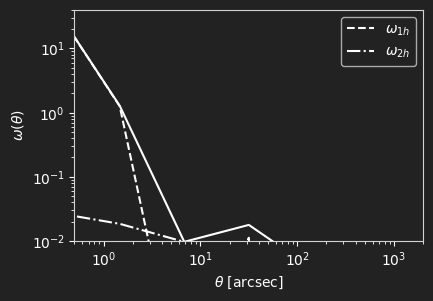

In [15]:
___PLOT_FOR_KEYNOTE___ = 1
COL = 'w' if ___PLOT_FOR_KEYNOTE___ else 'k'
line_c, cmap_c, _col_, col_A, col_B, col_C, col_D, fn_prefix = lens_plot.set_plt_param(___PLOT_FOR_KEYNOTE___)
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
ax.plot(_theta_arcsec, omega1h, c = COL,ls = '--', label=r'$\omega_{1h}$')
ax.plot(_theta_arcsec, omega2h, c = COL,ls = '-.', label=r'$\omega_{2h}$')
ax.plot(_theta_arcsec, omega1h+omega2h, c = COL,ls = '-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.5,2e3))
ax.set_ylim((1e-3,4e0)) if z < 3.7 else ax.set_ylim((1e-2,4e1))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
plt.legend()
plt.show()